In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
%matplotlib inline
%load_ext autoreload
%autoreload 2

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)

from data.datasets import MovieSet
from curvature.curvature_schemas import CurvaturePixels, CurvatureResponse, TemporalFilter, SpatialRescale, CurvatureResponseSample, Seed, DimensionSample
from data import data_schemas as data
from utils.utils import get_trial_idx, type_object_movie
from utils.curvature import compute_curvature
from visualization.visualize import scatter_brain_areas, brain_area_curvature, histogram_object_types, scatter_pix_responses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Subsample neurons and plot performance

In [98]:
scan = data.MovieScan & dict(animal_id = 16314)
rel  = dj.U('brain_area', 'layer', 'sample_size','seed').aggr((CurvatureResponseSample & scan), average_curvature='avg(avg_curvature)')
df   = pd.DataFrame(rel.fetch())

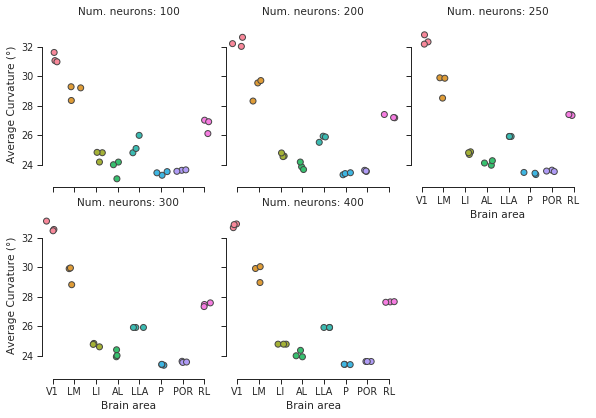

In [135]:
order_areas = ['V1', 'LM', 'LI', 'AL', 'LLA','P', 'POR','RL']
sns.set_context('paper', font_scale=1.1)
sns.set_palette(sns.xkcd_palette(['grey', 'golden yellow']))
with sns.axes_style("ticks"):
    g = sns.catplot('brain_area', 'average_curvature', data=df, col='sample_size', col_wrap=3, order=order_areas, \
                    kind='strip', s=6, linewidth=1, edgecolor="gray", jitter=0.3)
    g.set_xlabels('Brain area')
    g.set_ylabels('Average Curvature (°)')
    g.set_titles('Num. neurons: {col_name}')
sns.despine(trim=True)
g.fig.set_size_inches(8,5.5)
#g.fig.savefig('temp_vis/subsampled_neurons_brain_areas.png', bbox_inches='tight', dpi=200)